<a href="https://colab.research.google.com/github/alejoes83/Alura-Store/blob/main/Copia_de_AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



El total de ventas de la tienda 1 es de $1150880400.0
El total de ventas de la tienda 2 es de $1116343500.0
El total de ventas de la tienda 3 es de $1098019600.0
El total de ventas de la tienda 4 es de $1038375700.0
El total de ventas de todas las tiendas es de $4403619200.0


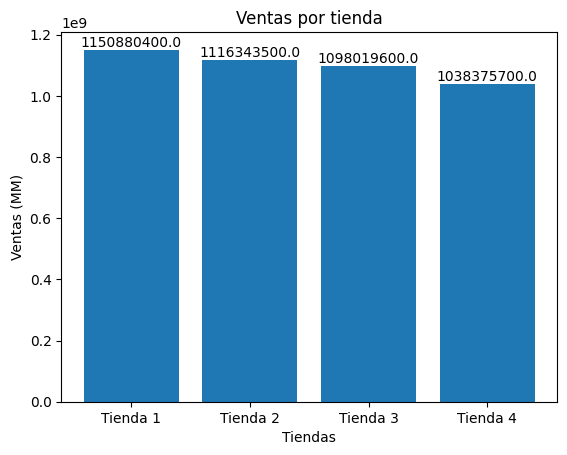

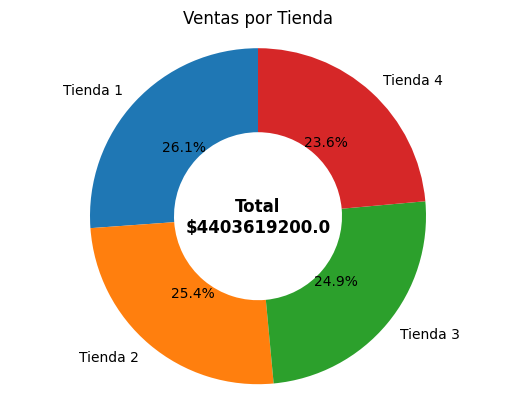

In [3]:
total_ventas_tienda = tienda1["Precio"].sum()
total_ventas_tienda2 = tienda2["Precio"].sum()
total_ventas_tienda3 = tienda3["Precio"].sum()
total_ventas_tienda4 = tienda4["Precio"].sum()

print(f"El total de ventas de la tienda 1 es de ${total_ventas_tienda}")
print(f"El total de ventas de la tienda 2 es de ${total_ventas_tienda2}")
print(f"El total de ventas de la tienda 3 es de ${total_ventas_tienda3}")
print(f"El total de ventas de la tienda 4 es de ${total_ventas_tienda4}")

ventas = [total_ventas_tienda, total_ventas_tienda2, total_ventas_tienda3, total_ventas_tienda4]
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

for i, valor in enumerate(ventas):
        plt.text(i, valor, str(valor), ha='center', va='bottom')


total_ventas = sum(ventas)
print(f"El total de ventas de todas las tiendas es de ${total_ventas}")

plt.bar(tiendas, ventas)
plt.xlabel("Tiendas")
plt.ylabel("Ventas (MM)")
plt.title("Ventas por tienda")
plt.show()


fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    ventas, labels=tiendas,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.5}
)
# Agregar el total en el centro
ax.text(0, 0, f'Total\n${total_ventas}', ha='center', va='center', fontsize=12, fontweight='bold')
ax.set_title('Ventas por Tienda')
plt.axis('equal')
plt.show()

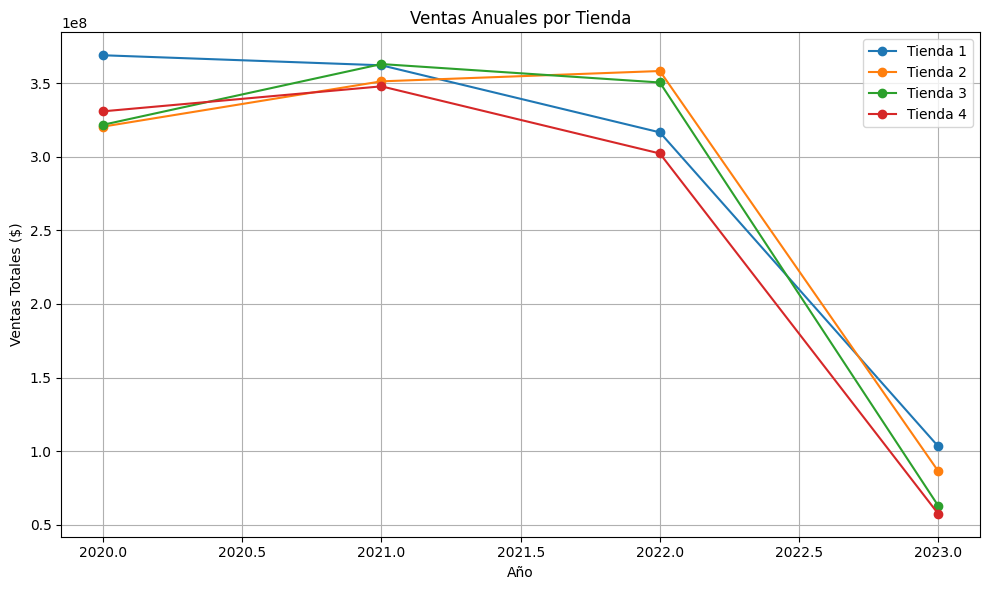

In [4]:
urls = {"Tienda 1": url1, "Tienda 2": url2, "Tienda 3": url3, "Tienda 4": url4}
ventas_anuales = {}

for nombre, url in urls.items():
    df = pd.read_csv(url)

    # Convertir fecha a datetime y extraer el año
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], format='%d/%m/%Y')
    df['año'] = df['Fecha de Compra'].dt.year

    # Agrupar por año y sumar precios
    ventas_por_anio = df.groupby('año')['Precio'].sum()
    ventas_anuales[nombre] = ventas_por_anio

# Crear DataFrame combinado
ventas_df = pd.DataFrame(ventas_anuales).fillna(0).astype(int)

# Graficar
plt.figure(figsize=(10, 6))
for tienda in ventas_df.columns:
    plt.plot(ventas_df.index, ventas_df[tienda], marker='o', label=tienda)

plt.title('Ventas Anuales por Tienda')
plt.xlabel('Año')
plt.ylabel('Ventas Totales ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64
Categoría del Producto
Artículos para el hogar     14746900.0
Deportes y diversión        34744500.0
Electrodomésticos          348567800.0
Electrónicos               410831100.0
Instrumentos musicales     104990300.0
Juguetes                    15945400.0
Libros                      10091200.0
Muebles                    176426300.0
Name: Precio, dtype: float64
Categoría del Producto
Artículos para el hogar     15060000.0
Deportes y diversión        35593100.0
Electrodomésticos          329237900.0
Electrónicos               410775800.0
Instrumentos musicales      77380900.0
Juguetes                    19401100.0
Libros         

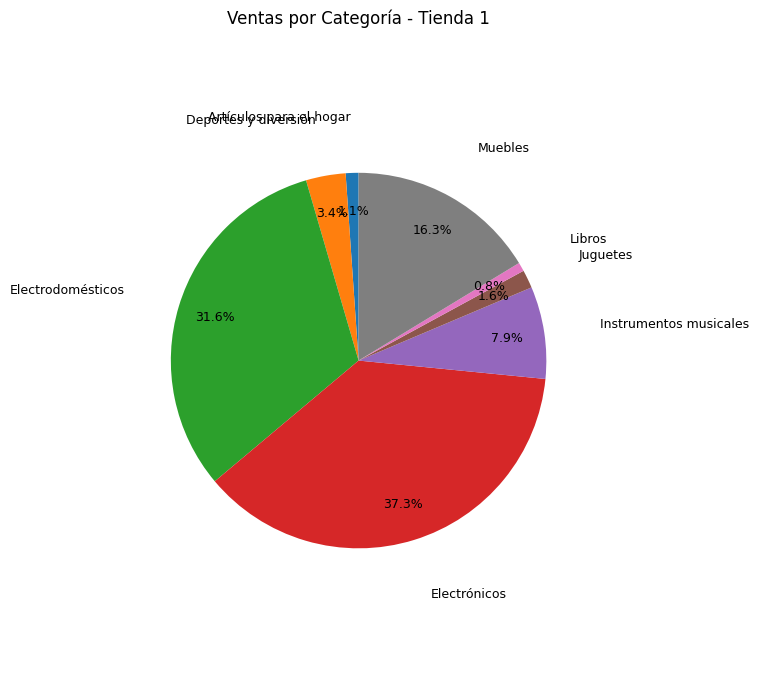

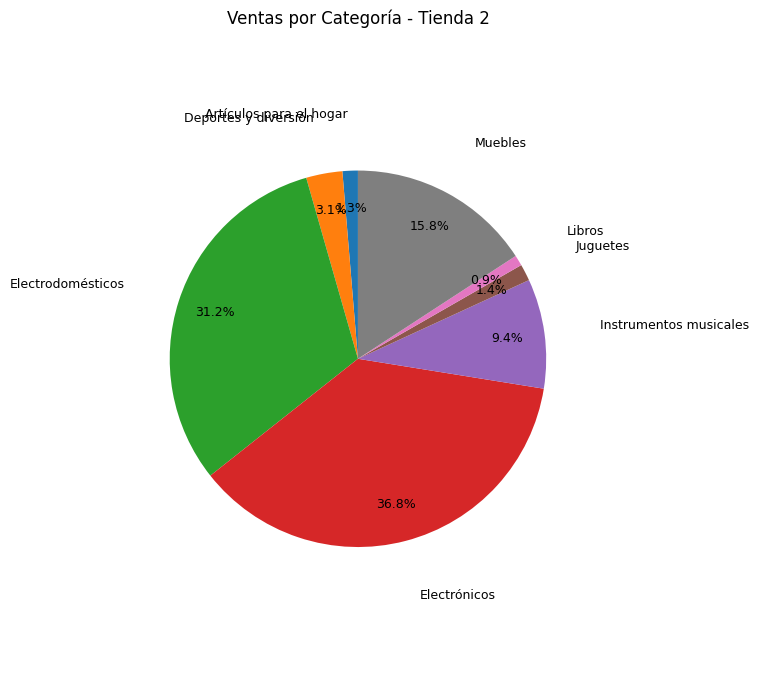

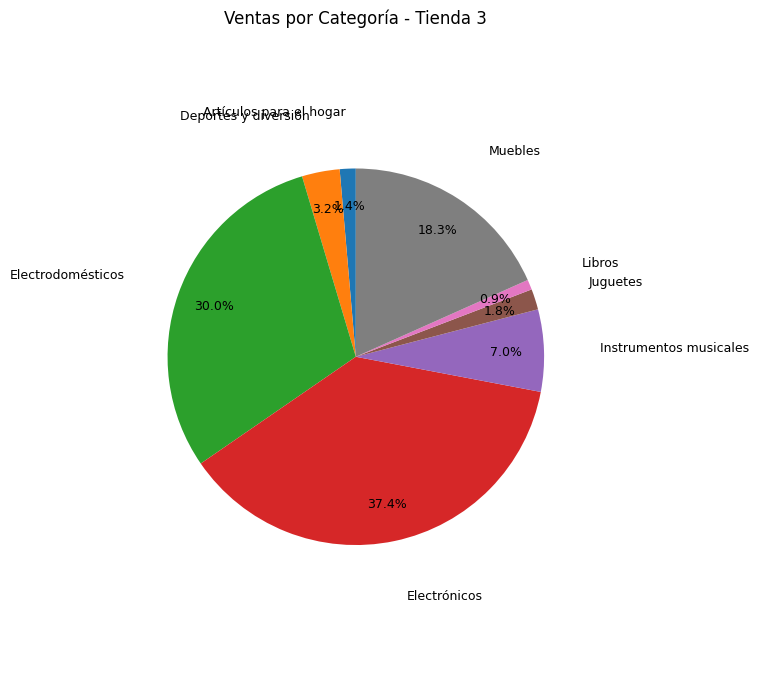

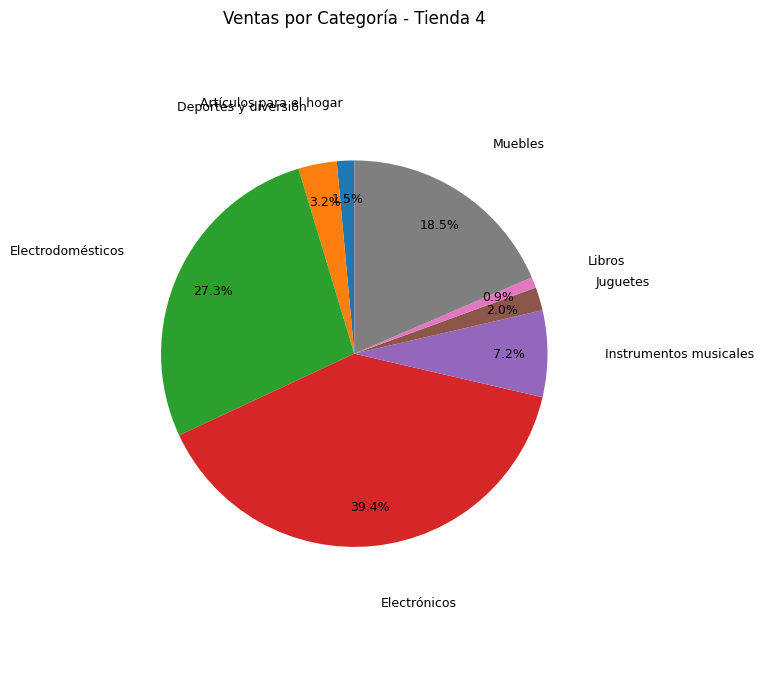

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ventas_por_categoria1 = tienda1.groupby("Categoría del Producto")["Precio"].sum()
ventas_por_categoria2 = tienda2.groupby("Categoría del Producto")["Precio"].sum()
ventas_por_categoria3 = tienda3.groupby("Categoría del Producto")["Precio"].sum()
ventas_por_categoria4 = tienda4.groupby("Categoría del Producto")["Precio"].sum()

ventas_categoria = [ventas_por_categoria1, ventas_por_categoria2, ventas_por_categoria3, ventas_por_categoria4]
print(ventas_por_categoria1)
print(ventas_por_categoria2)
print(ventas_por_categoria3)
print(ventas_por_categoria4)

nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

for i, ventas in enumerate(ventas_categoria):
    plt.figure(figsize=(8, 8))
    plt.pie(ventas, labels=ventas.index, autopct='%1.1f%%', startangle=90,pctdistance=0.8,
    labeldistance=1.3, textprops={'fontsize': 9} )
    plt.title(f'Ventas por Categoría - {nombres_tiendas[i]}')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()



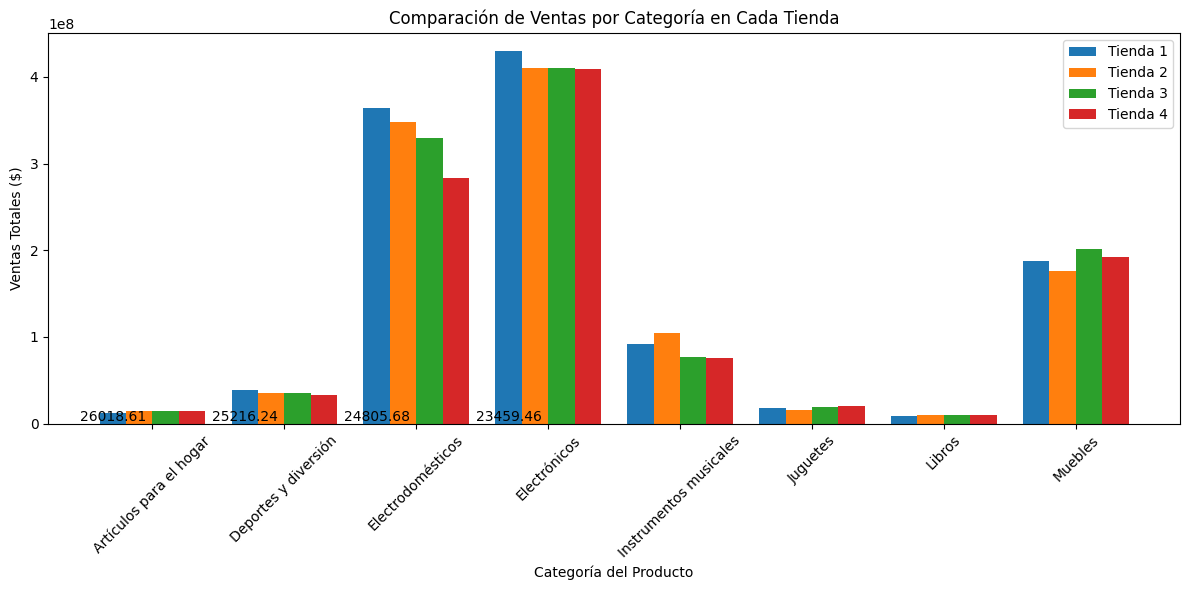

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Combinar todos los datos en un DataFrame
ventas_df = pd.concat([
    ventas_por_categoria1.rename("Tienda 1"),
    ventas_por_categoria2.rename("Tienda 2"),
    ventas_por_categoria3.rename("Tienda 3"),
    ventas_por_categoria4.rename("Tienda 4"),
], axis=1).fillna(0)

# Datos para graficar
categorias = ventas_df.index
n_categorias = len(categorias)
n_tiendas = ventas_df.shape[1]
bar_width = 0.2
x = np.arange(n_categorias)

# Crear gráfico
plt.figure(figsize=(12, 6))
for i, valor in enumerate(envios_tiendas):
        # Posiciona el texto encima de la barra
        plt.text(i, valor, str(valor), ha='center', va='bottom')

for i, tienda in enumerate(ventas_df.columns):
    plt.bar(x + i * bar_width, ventas_df[tienda], width=bar_width, label=tienda)

# Estética del gráfico
plt.xticks(x + bar_width * (n_tiendas - 1) / 2, categorias, rotation=45)
plt.xlabel("Categoría del Producto")
plt.ylabel("Ventas Totales ($)")
plt.title("Comparación de Ventas por Categoría en Cada Tienda")
plt.legend()
plt.tight_layout()
plt.show()

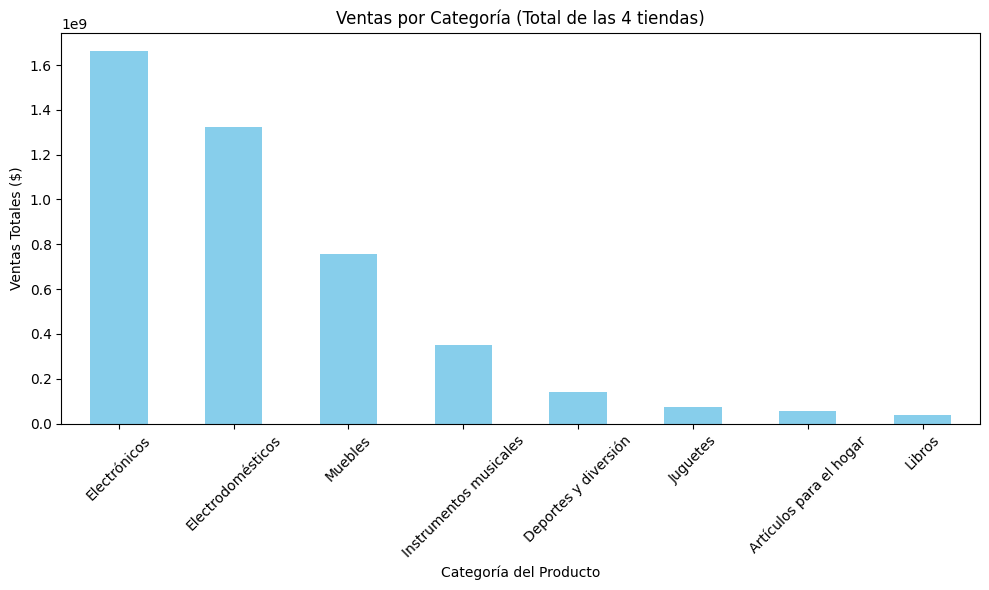

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Sumar las ventas de todas las tiendas por categoría
ventas_totales = ventas_por_categoria1.add(ventas_por_categoria2, fill_value=0)
ventas_totales = ventas_totales.add(ventas_por_categoria3, fill_value=0)
ventas_totales = ventas_totales.add(ventas_por_categoria4, fill_value=0)

# Ordenar de mayor a menor
ventas_totales = ventas_totales.sort_values(ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
ventas_totales.plot(kind='bar', color='skyblue')
plt.title("Ventas por Categoría (Total de las 4 tiendas)")
plt.ylabel("Ventas Totales MM ($)")
plt.xlabel("Categoría del Producto")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


La calificación promedio de la tienda 1 es de 3.98
La calificación promedio de la tienda 2 es de 4.04
La calificación promedio de la tienda 3 es de 4.05
La calificación promedio de la tienda 4 es de 4.0
Tienda 1 tiene la menor calificación de 3.98
Tienda 3 tiene la mayor calificación de 4.05


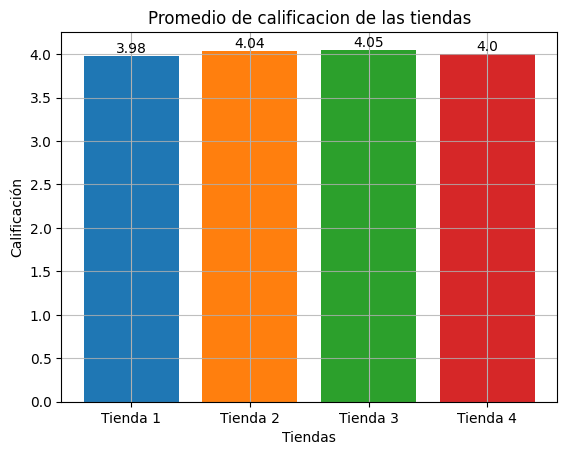

In [13]:
from matplotlib import pyplot as plt


prom_calificacion_tienda= tienda1["Calificación"].mean().round(2)
prom_calificacion_tienda2= tienda2["Calificación"].mean().round(2)
prom_calificacion_tienda3= tienda3["Calificación"].mean().round(2)
prom_calificacion_tienda4= tienda4["Calificación"].mean().round(2)


print (f"La calificación promedio de la tienda 1 es de {prom_calificacion_tienda}")
print (f"La calificación promedio de la tienda 2 es de {prom_calificacion_tienda2}")
print (f"La calificación promedio de la tienda 3 es de {prom_calificacion_tienda3}")
print (f"La calificación promedio de la tienda 4 es de {prom_calificacion_tienda4}")

nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

calificaciones = [prom_calificacion_tienda, prom_calificacion_tienda2, prom_calificacion_tienda3, prom_calificacion_tienda4]
menor_calificacion = min(calificaciones)
indice_menor = calificaciones.index(menor_calificacion)
print(f"{nombres_tiendas[indice_menor]} tiene la menor calificación de {menor_calificacion:.2f}")

mayor_calificacion = max(calificaciones)
indice_mayor = calificaciones.index(mayor_calificacion)
print(f"{nombres_tiendas[indice_mayor]} tiene la mayor calificación de {mayor_calificacion:.2f}")

for i, valor in enumerate(calificaciones):
        # Posiciona el texto encima de la barra
        plt.text(i, valor, str(valor), ha='center', va='bottom')
plt.bar([0], [prom_calificacion_tienda])
plt.bar([1], [prom_calificacion_tienda2])
plt.bar([2], [prom_calificacion_tienda3])
plt.bar([3], [prom_calificacion_tienda4])
plt.title("Promedio de calificacion de las tiendas")
plt.xticks([0, 1, 2, 3], ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"])
plt.xlabel("Tiendas")
plt.ylabel("Calificación")
plt.grid(True)
plt.grid(axis='y', alpha=0.8)
plt.show()

# 4. Productos más y menos vendidos

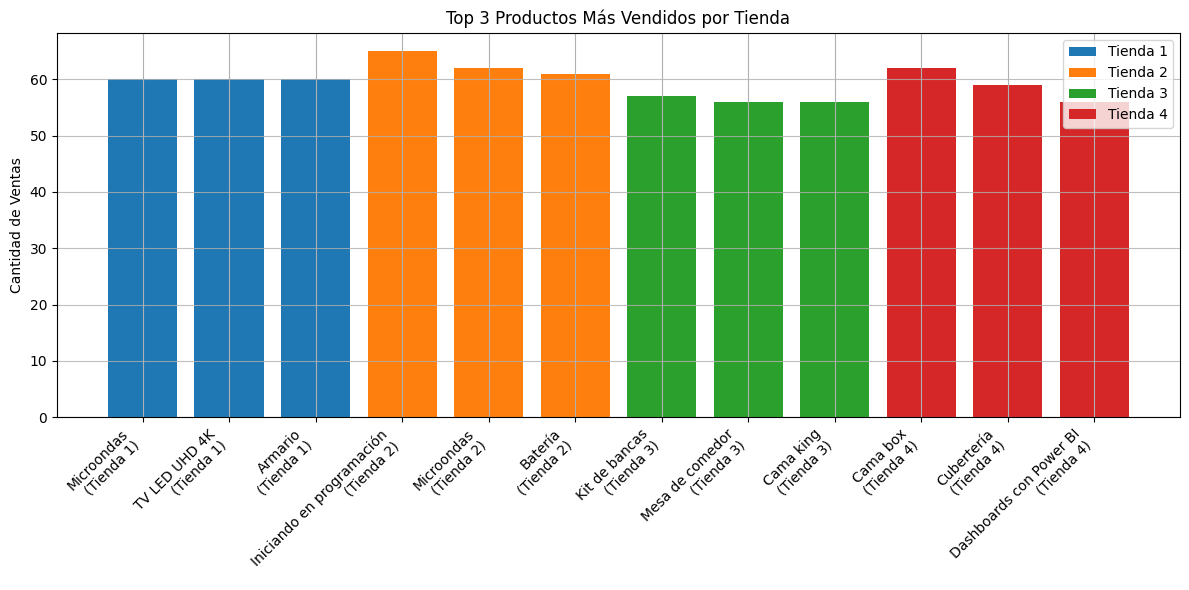

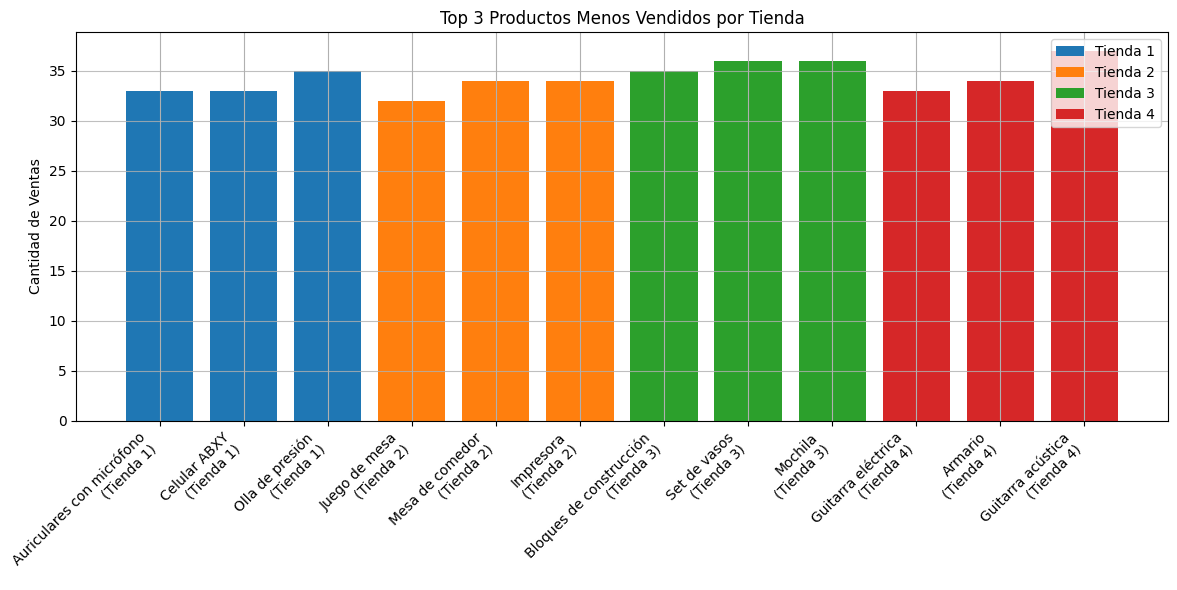

In [14]:
import pandas as pd
import matplotlib.pyplot as plt



tiendas = {'Tienda 1': tienda1, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}

top_productos_por_tienda = []

for tienda_nombre, df in tiendas.items():
    # Contar cuántas veces se vendió cada producto
    top3 = df['Producto'].value_counts().nlargest(3).reset_index()
    top3.columns = ['Producto', 'cantidad_vendida']
    top3['tienda'] = tienda_nombre


    top_productos_por_tienda.append(top3)


resultado = pd.concat(top_productos_por_tienda)

plt.figure(figsize=(12, 6))
for tienda in resultado['tienda'].unique():
    sub_df = resultado[resultado['tienda'] == tienda]
    plt.bar(sub_df['Producto'] + f'\n({tienda})', sub_df['cantidad_vendida'], label=tienda)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Cantidad de Ventas')
plt.title('Top 3 Productos Más Vendidos por Tienda')
plt.legend()
plt.grid(True)
plt.grid(axis='y', alpha=0.8)
plt.tight_layout()
plt.show()

less_productos_por_tienda = []

for tienda_nombre, df in tiendas.items():
    # Contar cuántas veces se vendió cada producto
    less3 = df['Producto'].value_counts().nsmallest(3).reset_index()
    less3.columns = ['Producto', 'cantidad_vendida']
    less3['tienda'] = tienda_nombre


    less_productos_por_tienda.append(less3)


resultado2 = pd.concat(less_productos_por_tienda)

plt.figure(figsize=(12, 6))
for tienda in resultado2['tienda'].unique():
    sub_df = resultado2[resultado2['tienda'] == tienda]
    plt.bar(sub_df['Producto'] + f'\n({tienda})', sub_df['cantidad_vendida'], label=tienda)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Cantidad de Ventas')
plt.title('Top 3 Productos Menos Vendidos por Tienda')
plt.legend()
plt.grid(True)
plt.grid(axis='y', alpha=0.8)
plt.tight_layout()
plt.show()


In [15]:

tablas_por_tienda = {}

for archivo in tiendas:
    nombre_tienda = archivo.replace('.csv', '').capitalize()
    df = pd.read_csv(url1)

    # Agrupar por producto: contar y sumar precio
    resumen = df.groupby('Producto').agg(
        cantidad_vendida=('Producto', 'count'),
        venta_total=('Precio', 'sum')
    ).reset_index()

    tablas_por_tienda[nombre_tienda] = resumen

# Mostrar resultados
for tienda, tabla in tablas_por_tienda.items():
    print(f"=== {tienda} ===")
    print(tabla)
    print()

=== Tienda 1 ===
                       Producto  cantidad_vendida  venta_total
0             Ajedrez de madera                49    1430600.0
1                       Armario                60   29462300.0
2             Asistente virtual                40    8058000.0
3                   Auriculares                50    5043700.0
4     Auriculares con micrófono                33    4730800.0
5           Balón de baloncesto                55    2749800.0
6             Balón de voleibol                42    2112200.0
7                       Batería                53   37693900.0
8                     Bicicleta                54   27444600.0
9       Bloques de construcción                56    1865700.0
10                     Cama box                44   22094700.0
11                    Cama king                44   31176600.0
12    Carrito de control remoto                52    3761800.0
13                 Celular ABXY                33   32651000.0
14  Ciencia de datos con Python       

In [16]:
repeticiones_productos = tienda1['Producto'].value_counts()
repeticiones_productos2 = tienda2['Producto'].value_counts()
repeticiones_productos3 = tienda3['Producto'].value_counts()
repeticiones_productos4 = tienda4['Producto'].value_counts()


print(repeticiones_productos)
print(repeticiones_productos2)
print(repeticiones_productos3)
print(repeticiones_productos4)

Producto
Microondas                     60
TV LED UHD 4K                  60
Armario                        60
Secadora de ropa               58
Mesa de noche                  56
Bloques de construcción        56
Balón de baloncesto            55
Bicicleta                      54
Vaso térmico                   54
Refrigerador                   54
Impresora                      54
Batería                        53
Cubertería                     52
Carrito de control remoto      52
Modelado predictivo            51
Auriculares                    50
Ajedrez de madera              49
Iphone 15                      49
Lavavajillas                   48
Lavadora de ropa               47
Guitarra eléctrica             47
Guitarra acústica              46
Sofá reclinable                46
Silla de oficina               46
Estufa                         45
Cama box                       44
Kit de bancas                  44
Smart TV                       44
Cama king                      44
Cubo 

# 5. Envío promedio por tienda

In [10]:
promedio_envio_tienda1= tienda1["Costo de envío"].mean().round(2)
promedio_envio_tienda2= tienda2["Costo de envío"].mean().round(2)
promedio_envio_tienda3= tienda3["Costo de envío"].mean().round(2)
promedio_envio_tienda4= tienda4["Costo de envío"].mean().round(2)

envios_tiendas = [promedio_envio_tienda1, promedio_envio_tienda2, promedio_envio_tienda3, promedio_envio_tienda4]

print (f"El costo promedio de envío de la tienda es de {promedio_envio_tienda1}")
print (f"El costo promedio de envío de la tienda 2 es de {promedio_envio_tienda2}")
print (f"El costo promedio de envío de la tienda 3 es de {promedio_envio_tienda3}")
print (f"El costo promedio de envío de la tienda 4 es de {promedio_envio_tienda4}")


El costo promedio de envío de la tienda es de 26018.61
El costo promedio de envío de la tienda 2 es de 25216.24
El costo promedio de envío de la tienda 3 es de 24805.68
El costo promedio de envío de la tienda 4 es de 23459.46


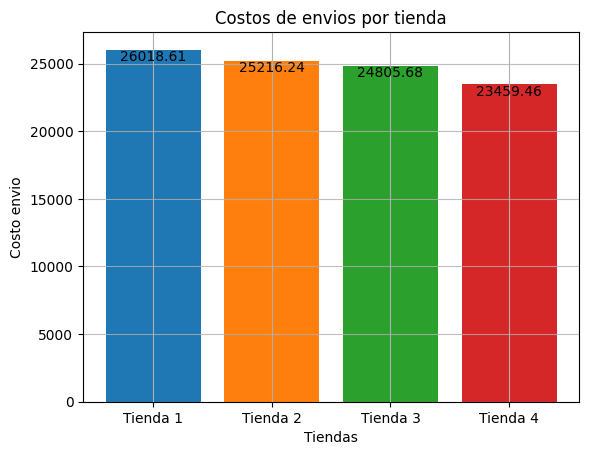

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

envios_tiendas_series = pd.Series(envios_tiendas, index=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"])
for i, valor in enumerate(envios_tiendas):
        # Posiciona el texto encima de la barra
        plt.text(i, valor, str(valor), ha='center', va='top')
plt.bar([0], [promedio_envio_tienda1])
plt.bar([1], [promedio_envio_tienda2])
plt.bar([2], [promedio_envio_tienda3])
plt.bar([3], [promedio_envio_tienda4])
plt.title("Costos de envios por tienda")
plt.xticks([0, 1, 2, 3], ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"])
plt.xlabel("Tiendas")
plt.ylabel("Costo envio")
plt.grid(True)
plt.grid(axis='y', alpha=0.8)
plt.show()

# **ALURA STORE:**
 **Informe de analisis.**



# **Introducción.**

El dueño de las tiendas Alura Store, el señor Juan requiere un análisis completo de las 4 sedes de Alura Store para determinar la posible venta de una de las tiendas para obtener recursos necesarios para un nuevo negocio que no es objeto de estudio del siguiente análisis. Para este análisis, se evaluaron 5 aspectos diferentes que son:
 1. Facturación total de cada tienda
 2. Categorías más populares por tienda
 3. Promedio de evaluación de clientes
 4. Productos más y menos vendidos
 5. Costo promedio de envío  
Se realizaron graficos comparativos entre las tiendas.




# **1.	Análisis de facturación.**

Se evidencia mediante gráficos que la tienda 1 tiene la mayor facturación con un aporte del 26.1% del total de ventas y que la tienda 4 es la de menos facturación con un aporte de 23.6% al total de ventas. También se encontró que la tendencia de la tienda 4 en el trascurso de los años 2020, 2021, 2022 y el parcial de 2023 es de ser la más baja facturación al cierre de cada año menos el primer año.
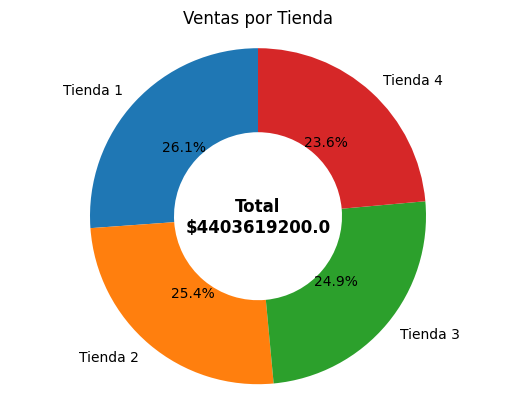


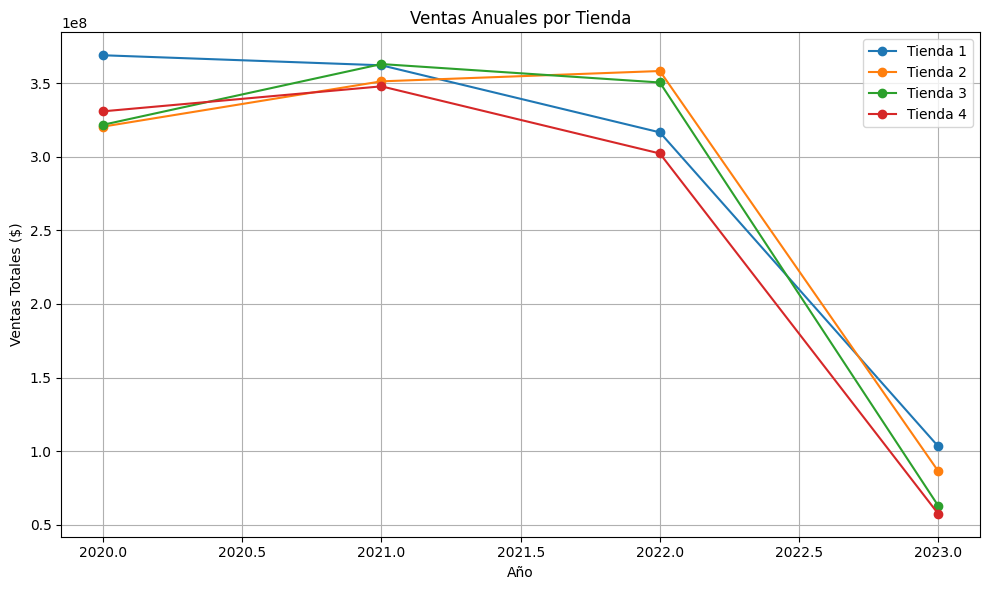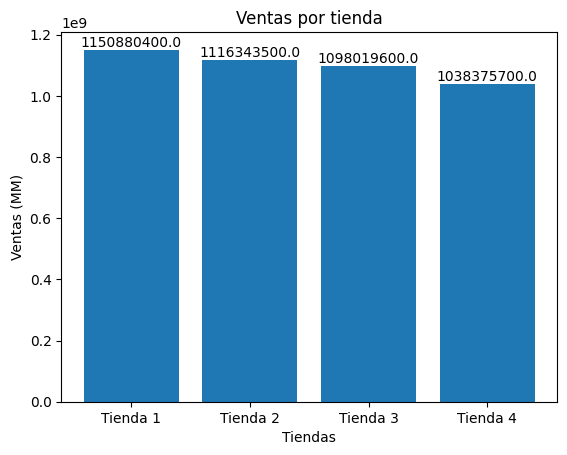



# **2.	Ventas por categoría.**

En el análisis observamos que las categorías mas populares son los electrónicos y los electrodomésticos en todas las tiendas y los de menos salidas son los juguetes muebles y artículos para el hogar. Con base en estos resultados se debería considerar una estrategia de mercadeo para potenciar las categorías de menor salida.

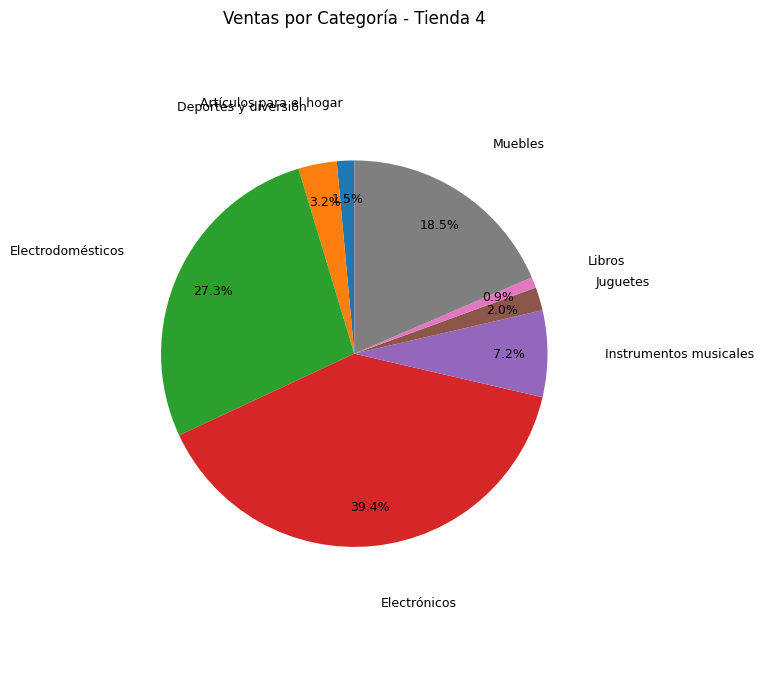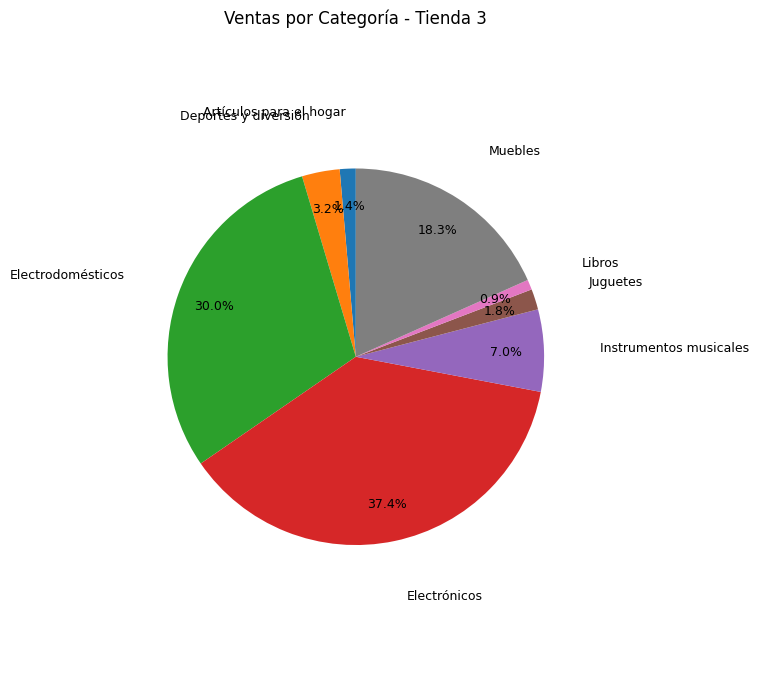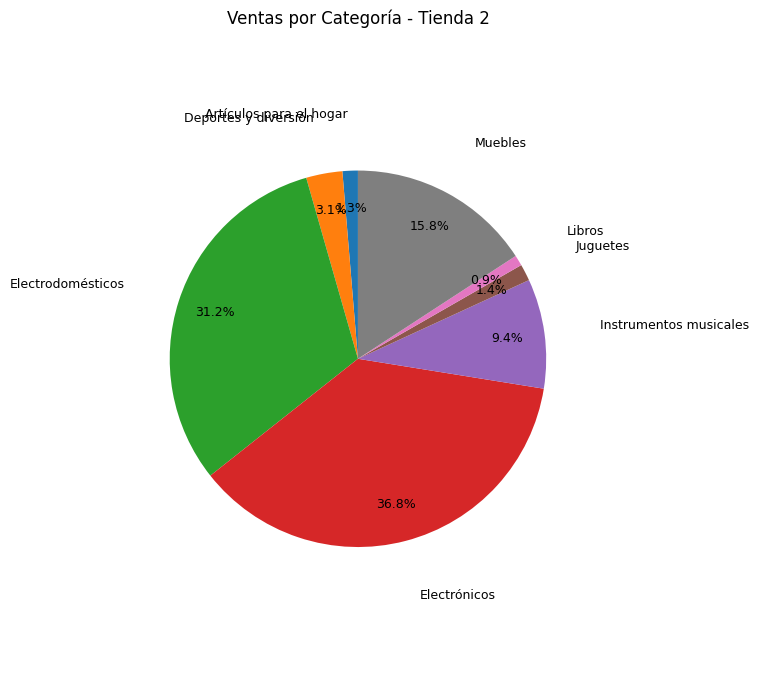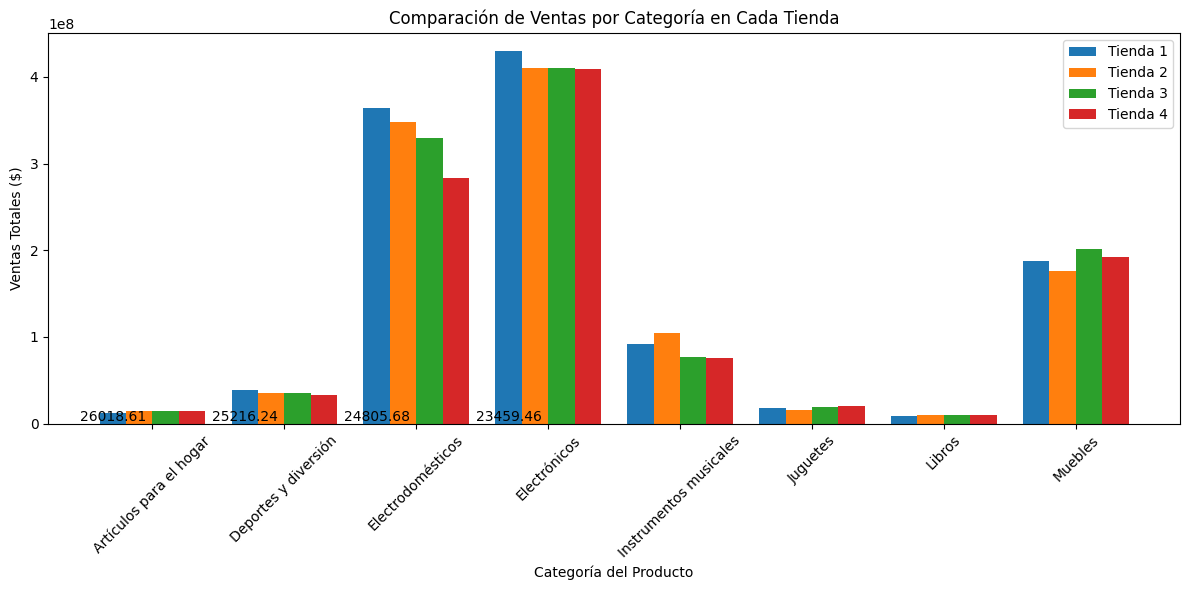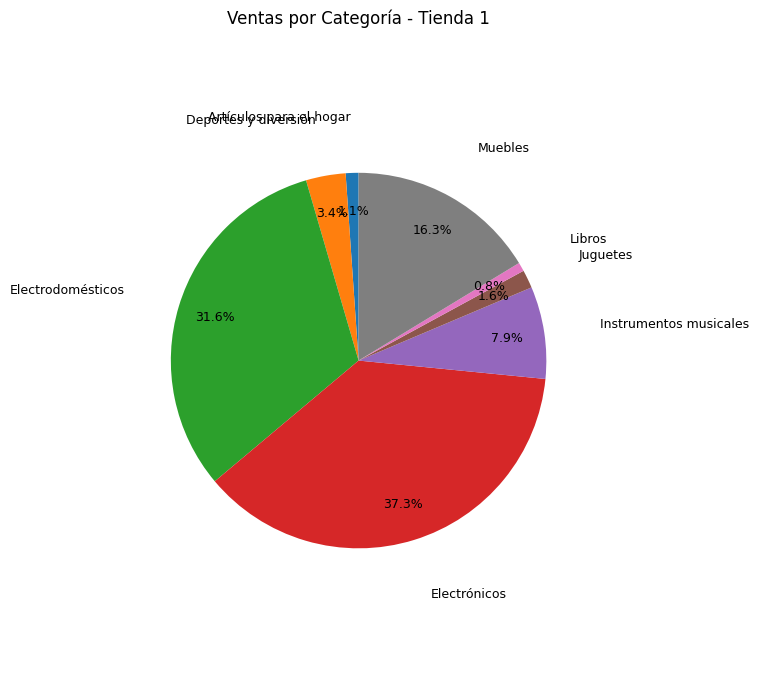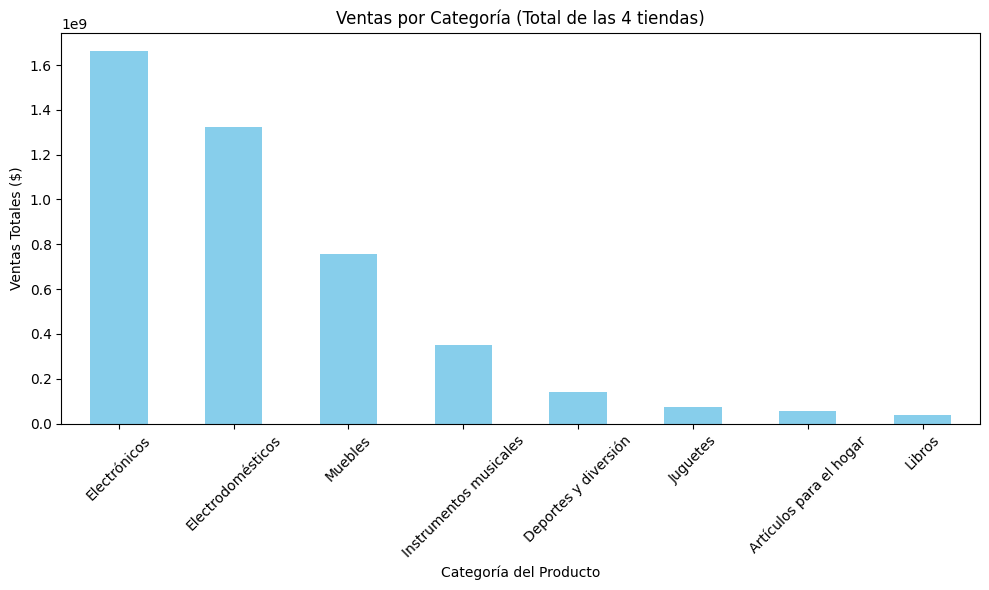

# **3.	Calificación promedio de la tienda.**

Al totalizar las calificaciones de cada tienda y ver el grafico comparativo vemos que no existe una gran diferencia entre la mejor calificada y la peor calificada que son la tienda 3 y la tienda 1 respectivamente con apenas una diferencia de 0.07 puntos, que podría considerarse despreciable pero que en un análisis más riguroso permitiría determinar esos aspectos a mejorar y extender a las 4 tiendas.  

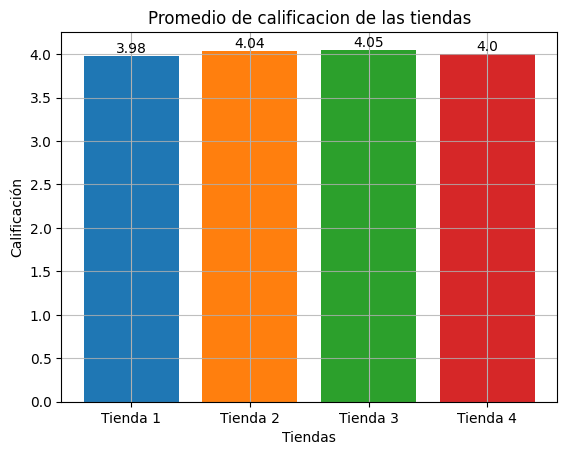


# **4.	Producto más y menos vendidos.**
A través de las gráficas podemos ver que cada tienda tiene productos diferentes que tienen en su top 3 de mas vendidos al igual que en los menos vendidos, lo que si podemos inferir en este análisis es que los productos mas vendidos en la tienda 4 son productos de menor valor y aunque en cantidad están a la par con las otras tiendas se queda en facturación por ser productos de bajo valor.

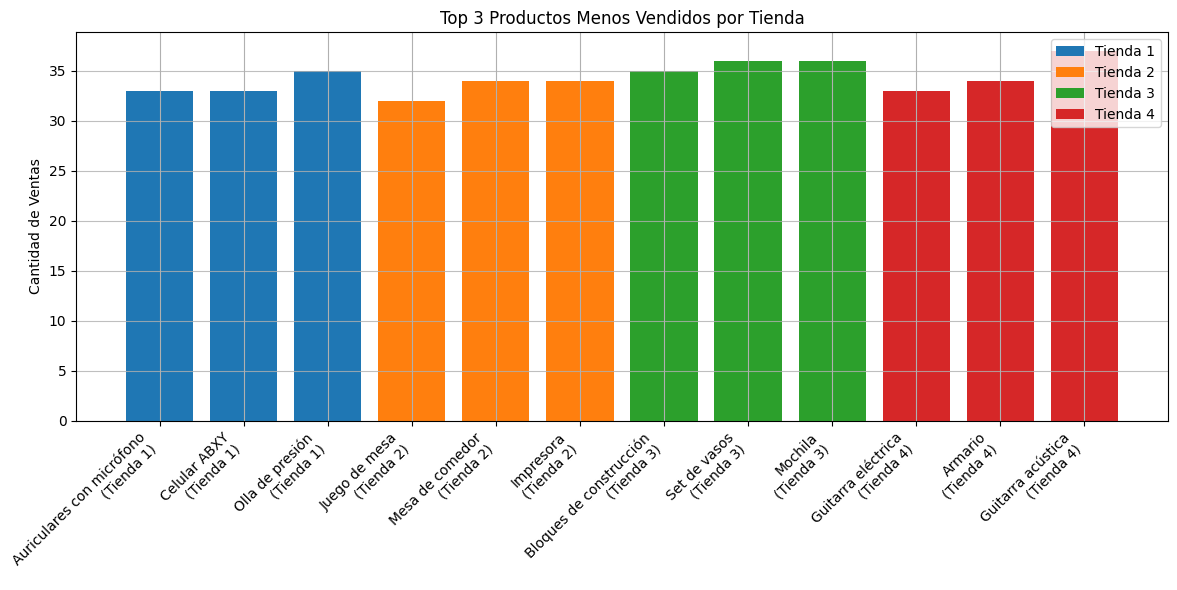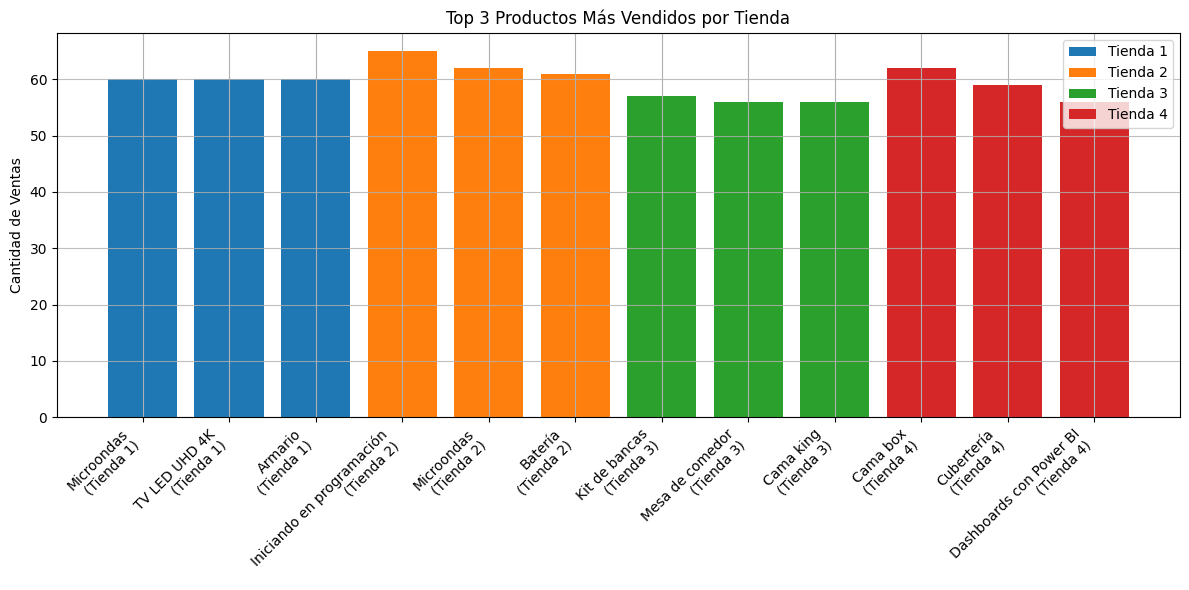

# **5.	Costo promedio de envío.**
Podemos inferir que la tienda 4 tiene menor promedio de costo por envío de acuerdo con la gráfica, pero esto no es del todo positivo porque este valor depende de la cantidad de ventas realizadas y del articulo vendido. El costo de envío si es un aspecto a mejorar en todas las tiendas porque si impacta al a costo operativo de la cadena de almacenes.

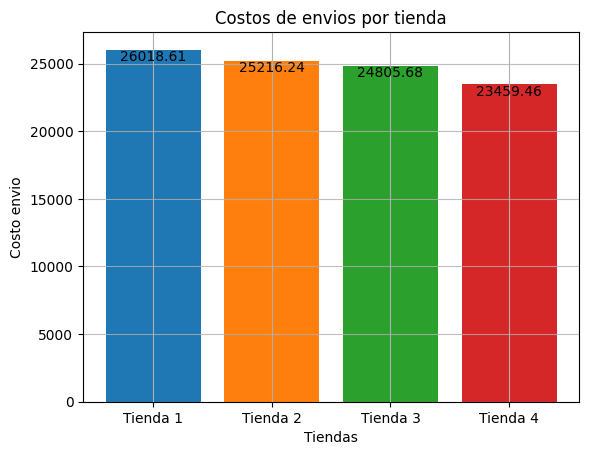

# **6.	Conclusión**
El principal objetivo de este análisis era determinar cual de la tiendas se debía vender por la necesidad de dinero para otras inversiones, así bien con la información proporcionada la mejor candidata para la venta es la tienda 4 por que tiene la menor facturación de los periodos analizados, a pesar de no tener la peor calificación de los clientes no es la mejor y podríamos decir que los costos de envío que solo es un ítem de los costos operativos de las tiendas no se puede tomar como un factor decisivo a la hora de tomar la decisión de la venta de la tienda porque depende de la cantidad y el articulo vendido, ahora bien si es un aspecto a mejorar en todas la tiendas.   







